# Import data

In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import pandas_datareader as pdr
from datetime import datetime
import seaborn as sns 
    
sd = datetime(2000, 1, 1)
ed = datetime(2019, 12, 31)

vix = pdr.get_data_yahoo(symbols='^vix', start=sd, end=ed)["Adj Close"]
sp500 = pdr.get_data_yahoo(symbols='^SP500TR', start=sd, end=ed)["Adj Close"]
spy = pdr.get_data_yahoo(symbols='SPY', start=sd, end=ed)["Adj Close"]

In [5]:
bnp = pd.concat([vix,sp500,spy], axis=1)
bnp = bnp.sort_values(by="Date",ascending=False)
bnp.columns = ['result','sp500','spy']

# Check data quality

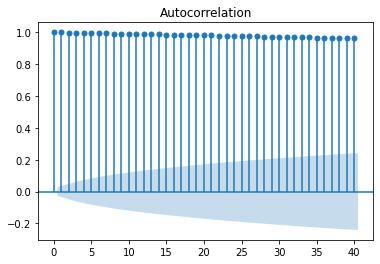

In [8]:
#非ＩＩＤ
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(bnp['spy'],lags=40)
plt.show()

# 模型建立

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [10]:
#X 參數資料
#Y 預測結果

X = bnp[['sp500', 'spy']].values
y = bnp['result'].values


In [11]:
#資料切割：80% Traning, 20% Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_test, X_valid, y_test, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
lm = LinearRegression() 
lm.fit(X_train,y_train)#訓練模型

LinearRegression()

In [12]:
#模型測試
y_pred = lm.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
df1

,Actual,Predicted
0,17.549999,23.616326
1,33.389999,23.523726
2,17.610001,22.898243
3,17.530001,13.740705
4,19.799999,24.695035
5,41.040001,29.009924
6,15.360000,16.416700
7,12.840000,19.132294
8,19.170000,21.325225
9,35.320000,25.044800


/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

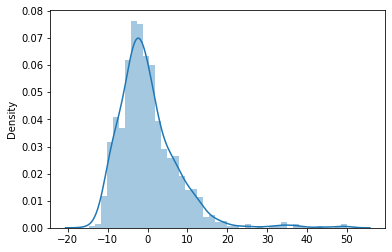

In [14]:
#結果畫圖
sns.distplot((y_test-y_pred))

# 結果評估

In [15]:
from sklearn import metrics

In [16]:
metrics.mean_absolute_error(y_test,y_pred)

5.4194247295823095